kaggle link : https://www.kaggle.com/datasets/mlbysoham/adult-dataset
This is a regression problem

In [12]:
import pandas as pd
iopub_data_rate_limit=200000000.0 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("/users/amulya/Downloads/archive (6)/adult_test.csv")
# print(df.columns)
unwanted_columns = ['Unnamed: 2','education-num']
df = df.drop(unwanted_columns, axis = 1)
# print(df.dtypes)
df.replace(' ?', 'Other', inplace=True)
nullcounts = df.apply(lambda x: x[x == ' ?'].count())
# print(nullcounts)
null_values = df.isna().sum()
# print(null_values)
df['Income'] = df['Income'].replace({' <=50K.' :0, ' >50K.' : 1 })
# df['Income'] = df['Income'].replace({' Approved': 1, ' Rejected': 0})
# print(df['Income'])
a = df['age'].value_counts()
# print(a)
print(df.describe().T)
df['workclass'] = df['workclass'].replace({' Never-worked': ' Without-pay'})
df['education'] = df['education'].replace({' 10th': 'Schooling', ' 1St-4th': 'Schooling', ' 5th-6th': 'Schooling',' 7th-8th':'Schooling',' 9th':'Schooling',' 11th':'Intermediate',' 12th':'Intermediate'})
df['marital-status'] = df['marital-status'].replace({' Married-AF-spouse': ' Married-civ-spouse'})
# print(df['Income'])
# print(df.head())
# correlation = df['capital-gain'].corr(df['Income'])
# corr = df['capital-loss'].corr(df['Income'])
# print(correlation)
# print(corr)
print(df.columns)

                  count         mean          std   min   25%   50%   75%  \
age             16281.0    38.767459    13.849187  17.0  28.0  37.0  48.0   
capital-gain    16281.0  1081.905104  7583.935968   0.0   0.0   0.0   0.0   
capital-loss    16281.0    87.899269   403.105286   0.0   0.0   0.0   0.0   
hours-per-week  16281.0    40.392236    12.479332   1.0  40.0  40.0  45.0   
Income          16281.0     0.236226     0.424776   0.0   0.0   0.0   0.0   

                    max  
age                90.0  
capital-gain    99999.0  
capital-loss     3770.0  
hours-per-week     99.0  
Income              1.0  
Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Income'],
      dtype='object')


/var/folders/2t/qm1yw0fs74gbtb4m6jqsrblc0000gp/T/ipykernel_89843/683290393.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Income'] = df['Income'].replace({' <=50K.' :0, ' >50K.' : 1 })


financial status, loans , credit cards,and marketing
predicting output
classification - binary, multiclass
preprocessing - null values, duplicates, category to nummerical, how input effects output
splitting the data , passing the data to model
accuracy
in this I'm having null values in 3 columns(country,workplace,occupation), occupation column effecting workclass column, I didn't find any pattern which cause these columns to be null so I'm replacing all null values with others
1. age - most of the people are between 20 to 50 age and i can see less people above 50
2. i'm dropping  these columns Unnamed: 2, education-num - same as education column
3. capital-loss column having more number of zeroes - can i remove this column?

Income                0     1
workclass                    
 Federal-gov        282   190
 Local-gov          733   310
 Private           8786  2424
 Self-emp-inc       263   316
 Self-emp-not-inc   968   353
 State-gov          506   177
 Without-pay          8     2
Other               889    74


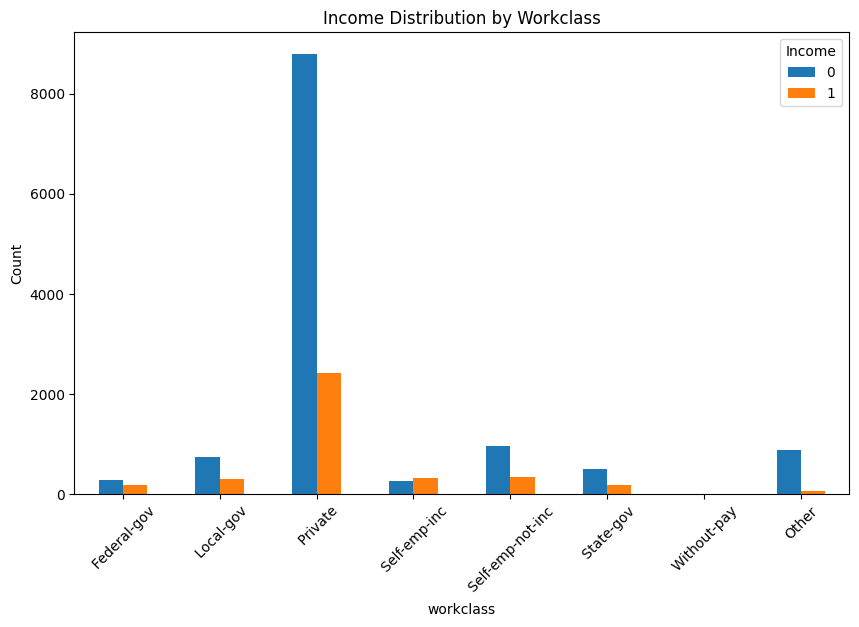

Income            0     1
education                
 1st-4th         77     2
 Assoc-acdm     386   148
 Assoc-voc      518   161
 Bachelors     1578  1092
 Doctorate       56   125
 HS-grad       4455   828
 Masters        434   500
 Preschool       31     1
 Prof-school     64   194
 Some-college  2911   676
Intermediate    814    47
Schooling      1111    72


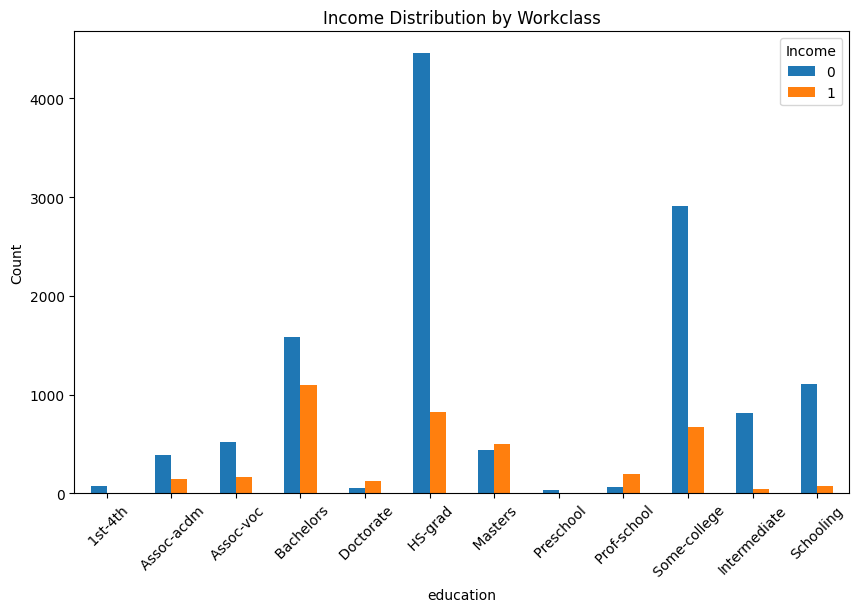

Income                    0     1
marital-status                   
Divorced               1982   208
Married-civ-spouse     4121  3296
Married-spouse-absent   186    24
Never-married          5192   242
Separated               472    33
Widowed                 482    43


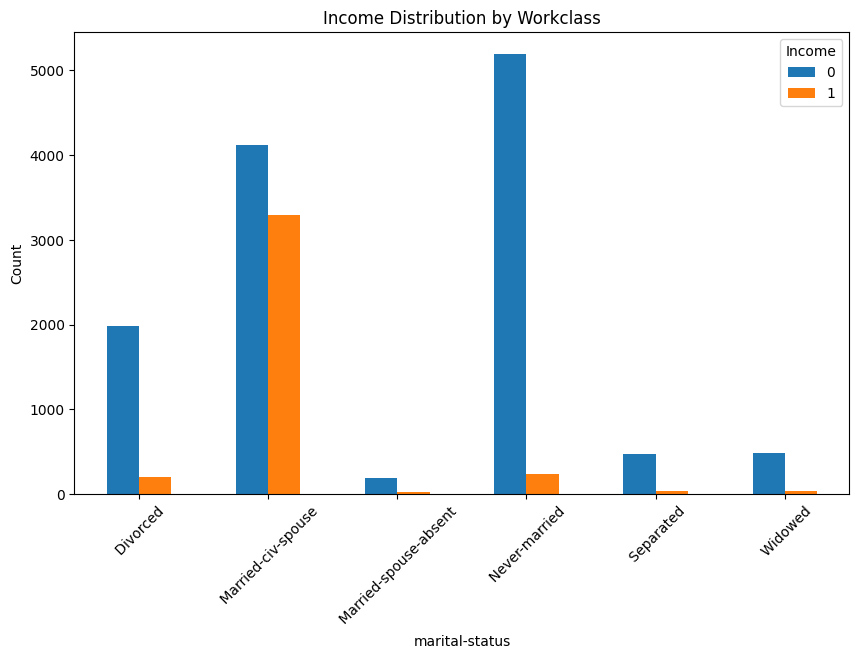

Income             0     1
relationship              
Husband         3595  2928
Not-in-family   3858   420
Other-relative   510    15
Own-child       2469    44
Unmarried       1588    91
Wife             415   348


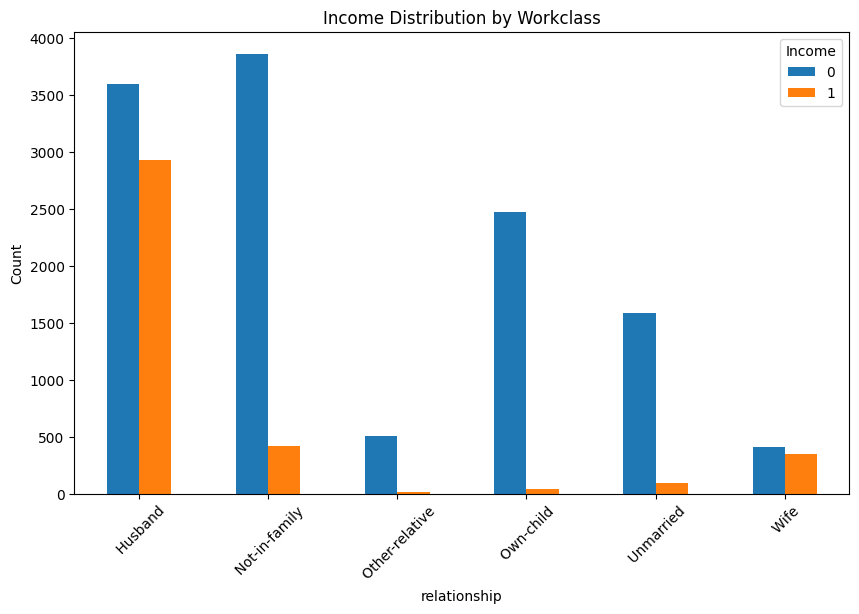

Income                  0     1
race                           
Amer-Indian-Eskimo    140    19
Asian-Pac-Islander    347   133
Black                1382   179
Other                 110    25
White               10456  3490


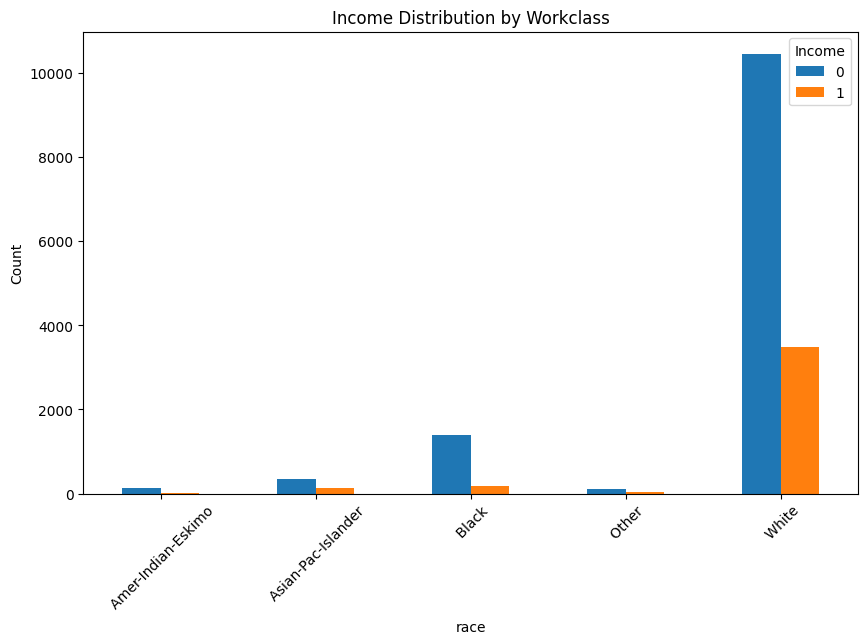

Income     0     1
sex               
Female  4831   590
Male    7604  3256


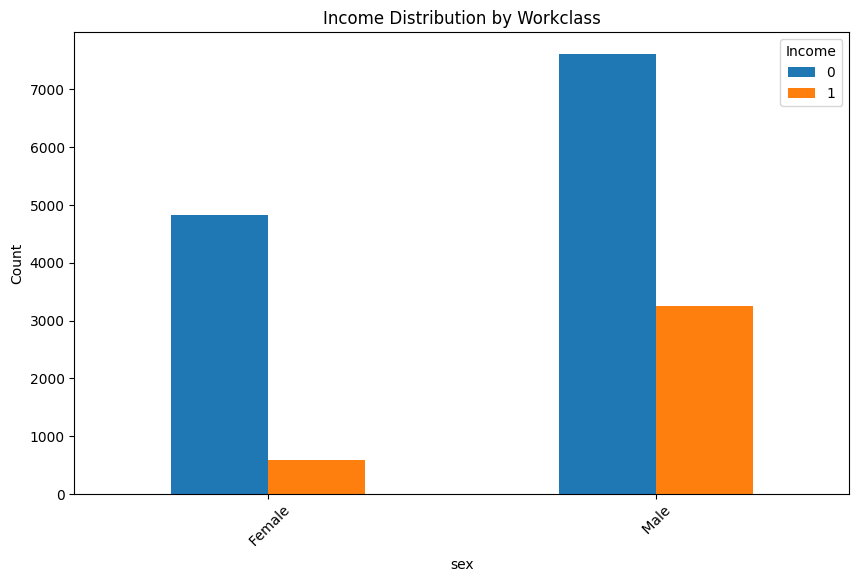

In [14]:
columns = ['workclass','education','marital-status','relationship','race','sex']
for i in columns:
    income_distribution_by_column = df.groupby([df[i], 'Income']).size().unstack(fill_value=0)
    print(income_distribution_by_column)
    income_distribution_by_column.plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Income Distribution by Workclass')
    plt.xticks(rotation=45)
    plt.legend(title='Income')
    plt.show()

1. workclass - most of the people fall under private category and income is below 50k
2. education - most of the people belongs to higher studies graduation
3. marital status - Married-civ-spouse
4. relationship - husband
5. race - white
6. gender - male
7. In all the categories most of the people income is less than the 50k

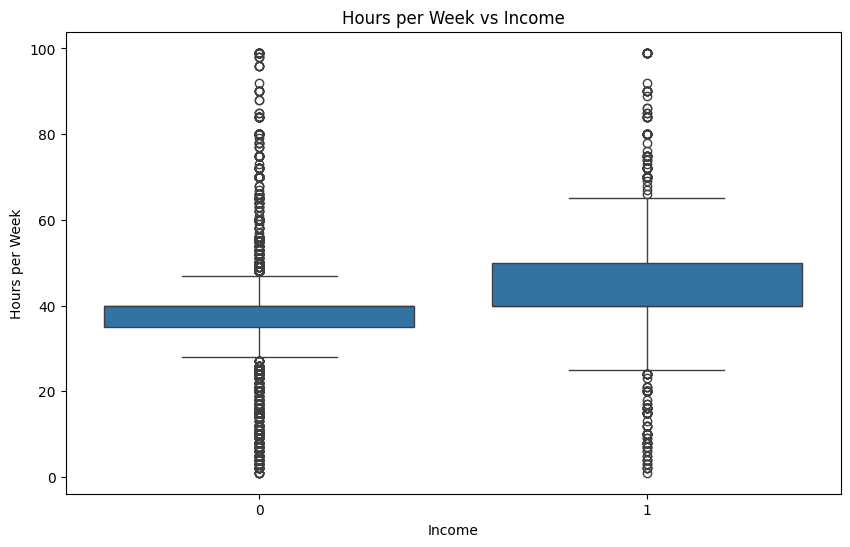

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'], y=df['hours-per-week'], data=df)
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.title('Hours per Week vs Income')
plt.show()

people who work for more time their income is >50k

In [16]:
workclass_dummies = pd.get_dummies(df['workclass'])
# df = df.drop('season',axis = 1)
df = pd.concat([df, workclass_dummies], axis=1)
education_dummies = pd.get_dummies(df['education'])
df = pd.concat([df,education_dummies],axis = 1)
maritalStatus_dummies = pd.get_dummies(df['marital-status'])
df = pd.concat([df,maritalStatus_dummies],axis=1)
occupation_dummies = pd.get_dummies(df['occupation'])
df = pd.concat([df,occupation_dummies],axis=1)
relationship_dummies = pd.get_dummies(df['relationship'])
df = pd.concat([df,relationship_dummies],axis=1)
race_dummies = pd.get_dummies(df['race'])
df = pd.concat([df,race_dummies],axis=1)
sex_dummies = pd.get_dummies(df['sex'])
df = pd.concat([df,sex_dummies],axis=1)
country_dummies = pd.get_dummies(df['native-country'])
df = pd.concat([df,country_dummies],axis=1)
# print(df.head())

In [17]:
duplicate_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
df = df.drop(duplicate_columns,axis = 1)
# print(df.columns)

In [18]:
df.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'Income',
       ' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay', 'Other', ' 1st-4th',
       ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad',
       ' Masters', ' Preschool', ' Prof-school', ' Some-college',
       'Intermediate', 'Schooling', ' Divorced', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed',
       ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial',
       ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct',
       ' Other-service', ' Priv-house-serv', ' Prof-specialty',
       ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving',
       'Other', ' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander',
       ' Black', ' Other', ' White', ' Female',

In [26]:
x_train.shape[1]

100

In [25]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical
y = df['Income']
x = df.drop('Income',axis = 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)
model = keras.Sequential([
keras.layers.Dense(64, input_dim = x_train.shape[1], activation='relu'),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(y_train.shape[1], activation='softmax')   
])



/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


IndexError: tuple index out of range

In [9]:
coeff_zero_columns = [' Without-pay', ' Preschool', ' Armed-Forces', ' Protective-serv', 'Other', ' Cambodia', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England', ' France', ' Guatemala', ' Haiti', ' Honduras', ' Hong', ' Hungary', ' Iran', ' Ireland', ' Jamaica', ' Laos', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland', ' Puerto-Rico', ' Scotland', ' Taiwan', ' Thailand', ' Trinadad&Tobago', ' Vietnam', ' Yugoslavia',' State-gov', ' Other']
# df = df.drop(coeff_zero_columns,axis = 1)
y = df['Income']
x = df.drop('Income',axis = 1)
# print(X_scaled)
age= df['age']
age_min = df['age'].min()
age_max = df['age'].max()
# print(age_min)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_scaled_df = pd.DataFrame(X_scaled, columns=x.columns)
X_scaled_df['age column'] = age
# print(X_scaled_df['age column'])
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)
actual_age = x_test['age column']
# print(actual_age)
x_train = x_train.drop('age column',axis = 1)
x_test = x_test.drop('age column',axis = 1)
model = LogisticRegression(C =  0.5, max_iter= 10, penalty= 'l1', solver = 'liblinear',fit_intercept=True,)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# print(len(y_pred))
probability = model.predict_proba(x_test)
# print(probability)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# confusion_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, probability[:, 1])
auc = roc_auc_score(y_test, y_pred)
print(f'accuracy : {accuracy}\nprecision : {precision}\nrecall : {recall}\nf1 score :{f1}')


accuracy : 0.8485158648925282
precision : 0.7231947483588621
recall : 0.5757839721254355
f1 score :0.6411251212415131


/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
y_train_pred = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy_train)

0.8567918567918568


for this dataset , accuracy of train and test data is almost equal 

In [10]:
x_test['actual_output'] = y_test
x_test['Predicted_output'] = y_pred
x_test['actual_age'] = actual_age
print(x_test[['actual_age','actual_output','Predicted_output']])

# final_df = pd.DataFrame(x_test, columns=x.columns)
# print(final_df.dtypes())

       actual_age  actual_output  Predicted_output
13633          29              0                 0
1921           31              0                 1
12140          52              0                 0
9933           54              0                 0
7745           41              0                 0
13499          60              0                 0
5046           19              0                 0
10062          56              0                 0
8612           33              1                 0
14440          23              0                 0
14203          18              0                 0
9994           49              1                 1
10762          48              0                 0
4153           34              0                 0
291            63              0                 0
2626           53              1                 1
123            41              0                 0
4502           44              0                 0
1199           51              

[' Without-pay', ' Assoc-acdm', ' Preschool', ' Armed-Forces', ' Protective-serv', 'Other', ' Cambodia', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England', ' France', ' Guatemala', ' Haiti', ' Honduras', ' Hong', ' Hungary', ' Iran', ' Ireland', ' Jamaica', ' Laos', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland', ' Puerto-Rico', ' Scotland', ' Taiwan', ' Thailand', ' Trinadad&Tobago', ' Vietnam', ' Yugoslavia']


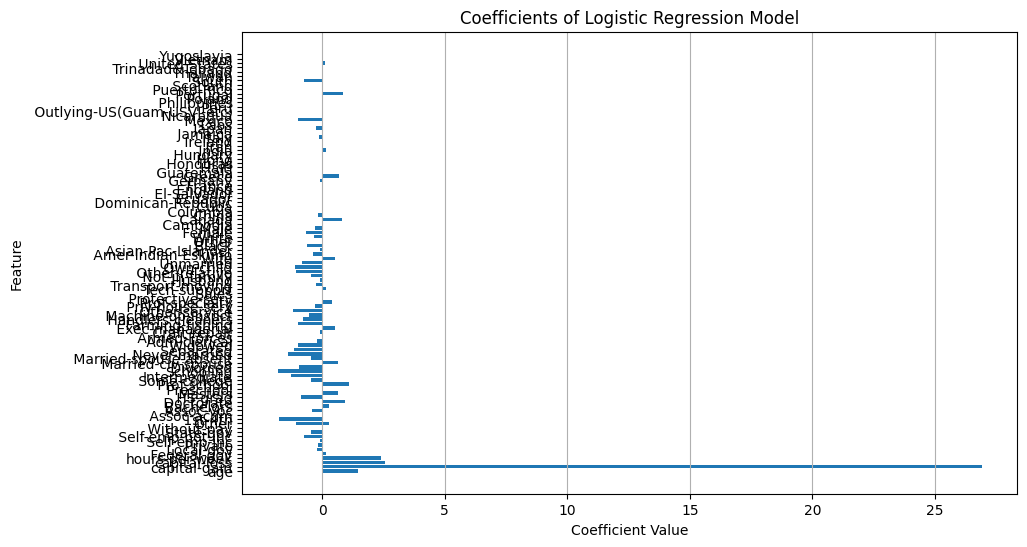

In [11]:
coefficients = model.coef_[0]
feature_names = x_train.columns
zero_coefficient_features = []
for feature, coefficient in zip(feature_names, coefficients):
    if coefficient == 0:
        zero_coefficient_features.append(feature)
print(zero_coefficient_features)
# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.grid(axis='x')
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier
y = df['Income']
x = df.drop('Income',axis = 1)
age= df['age']
age_min = df['age'].min()
age_max = df['age'].max()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_scaled_df = pd.DataFrame(X_scaled, columns=x.columns)
X_scaled_df['age column'] = age
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)
actual_age = x_test['age column']
# print(actual_age)
x_train = x_train.drop('age column',axis = 1)
x_test = x_test.drop('age column',axis = 1)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
oob_score = model.oob_score
print(oob_score)
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

False
Accuracy: 0.8464687819856704
Precision: 0.7034764826175869
Recall: 0.5993031358885017
F1 Score: 0.6472248353715898


applying grid search cv for random forest algo

In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'oob_score' : [True,False],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'random_state' : [None,10,17,20,30,40,50,55,80]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True, 'random_state': 10}
Best Score: 0.8653922927107149


In [14]:
y = df['Income']
x = df.drop('Income',axis = 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=17)
model = DecisionTreeClassifier(criterion =  'gini', max_depth= 10, min_samples_leaf= 6, min_samples_split= 2,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8620266120777892


hre i'm applying grid search cv for finding best parameters for decision tree

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 15,45,60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6],
    'random_state' : [None, 10,20,30,40,50]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_

In [190]:
# bins = [0,20, 40, 60, 90]
# labels = ['0-20', '21-40', '41-60', '61-90']
# x_test['age_group'] = pd.cut(x_test['actual_age'], bins=bins, labels=labels)
# performance_by_age_group = x_test.groupby('age_group').apply(lambda x: pd.Series({
#     'Accuracy': accuracy_score(x_test['actual_output'], x_test['Predicted_output']),
#     'Precision': precision_score(x_test['actual_output'], x_test['Predicted_output']),
#     'Recall': recall_score(x_test['actual_output'], x_test['Predicted_output']),
#     'F1 Score': f1_score(x_test['actual_output'], x_test['Predicted_output'])
# }))
# print(performance_by_age_group)

In [193]:
# num_below_20 = (x_test['actual_age'] == '0-20').sum()
# a = (x_test['actual_age'] == '21-40').sum()
# b = (x_test['actual_age'] == '41-60').sum()
# c = (x_test['actual_age'] == '61-90').sum()
# print(num_below_20)
# print(a)
# print(b)
# print(c)

grid search cv for logistic regression 

In [9]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear'],  # Algorithm to use in the optimization problem
    'max_iter': [10,30,50,60,100, 200, 300,1000,400,800],  # Maximum number of iterations
    'fit_intercept': [True,False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=5)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the GridSearchCV object
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')


/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homeb

Best Hyperparameters: {'C': 0.5, 'fit_intercept': False, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8487205731832139
Precision: 0.7234972677595628
Recall: 0.5766550522648084
F1 Score: 0.641783809985458


/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
